In [1]:
# Import required libraries
import sys
import numpy as np
import pandas as pd 
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("System/Python Information", sys.version)
print("Numpy Version", np.__version__)
print("Pandas Version", pd.__version__) 
print("Matplotlib Version",  mt.__version__)
print("Seabon Version", sns.__version__)

System/Python Information 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
Numpy Version 1.26.4
Pandas Version 2.2.2
Matplotlib Version 3.8.4
Seabon Version 0.13.2


In [3]:
# Reading netflix csv data from netflix.csv
netflix_data = pd.read_csv('netflix.csv')

In [4]:
# Get Basic Information about the DataFrame
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Displaying data types of each column
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Find out Netflix Data Dimensions
netflix_data.shape

(8807, 12)

In [8]:
# Summary statistics for numerical columns
netflix_data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
# Viewing and understanding few 5 rows of the Netflix DataFrame
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# Data Cleaning, Data Analysis & Visualisation

def unnest_dataframe(df, column):
    return (
        df.drop(column, axis =1 )
            .join(df[column].str.split(',', expand = True)
                .stack()
                .reset_index(level = 1, drop = True)
                .rename(column)
        ))

# Unnesting the 'Cast' Column
unnested_cast = unnest_dataframe(netflix_data, 'cast');

# Unnesting the 'title' Column
unnested_title = unnest_dataframe(netflix_data, 'title');

# Unnesting the 'country' Column
unnested_country = unnest_dataframe(netflix_data, 'country');

# Unnesting the 'listed_in' (genre) Column
unnested_listed_in = unnest_dataframe(netflix_data, 'listed_in');

# Unnesting the 'director' Column
unnested_director = unnest_dataframe(netflix_data, 'director');

# Showing the first few rows of un-nested dataframes
unnested_cast.head(5), unnested_title.head(5), unnested_country.head(5), unnested_listed_in.head(5), unnested_director.head(5)

(  show_id     type                 title         director        country  \
 0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 1      s2  TV Show         Blood & Water              NaN   South Africa   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 
                                          listed_in  \
 0                                    Documentaries   
 1  International TV Shows, TV Dramas, TV Mysteries   
 1  International TV 

In [11]:
# Check for Missing Values
# netflix_data.isna().sum()
netflix_data.isnull().sum()

# This methods will display the count of missing values for each columns

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# For Categorical variables with null values, update thos rows as unknown_columns_name

categorical_columns = ['director', 'cast', 'country', 'listed_in', 'rating', 'date_added', 'release_year']

for i in categorical_columns:
    netflix_data.fillna({i: f'Unknown {i.capitalize()}'}, inplace=True) 

netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# Replace with 0 for continuous variables having null values

continuous_columns = ['duration']

for i in continuous_columns:
    netflix_data.fillna({i: 0}, inplace=True)

netflix_data.query('duration == 0')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,0,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,0,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,0,Movies,The comic puts his trademark hilarious/thought...


In [14]:
# Check for null values again to confrim the changes
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [16]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
# Non-Graphical Analusis : Value Counts and Unique Attributes

# 1. Director Column
director_value_count = unnested_cast['director'].value_counts()

director_value_count

# 2. Rating Column
#rating_value_count = netflix_data['rating'].value_counts()

#rating_value_count

# 3. Cast Column
#cast_value_count = unnested_cast['cast'].value_counts()

#cast_value_count

director
Martin Scorsese               139
Cathy Garcia-Molina           125
Rajiv Chilaka                 121
Steven Spielberg              121
Youssef Chahine               104
                             ... 
Dylan Mohan Gray                1
Ah Loong                        1
Justin Bare, Matthew Miele      1
Jon Schnitzer                   1
Kirsten Johnson                 1
Name: count, Length: 4528, dtype: int64

In [18]:

#a) Non-graphical analysis: Value counts for each categorical variable

categorical_columns= ['director','type','country','listed_in', 'release_year', 'date_added','cast','rating', 'duration']
value_counts ={}
for column in categorical_columns: value_counts[column] = netflix_data[column].value_counts()

#Return the non-graphical analysis results
print(value_counts)



{'director': director
Unknown Director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64, 'type': type
Movie      6131
TV Show    2676
Name: count, dtype: int64, 'country': country
United States                             2818
India                                      972
Unknown Country                            831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                 

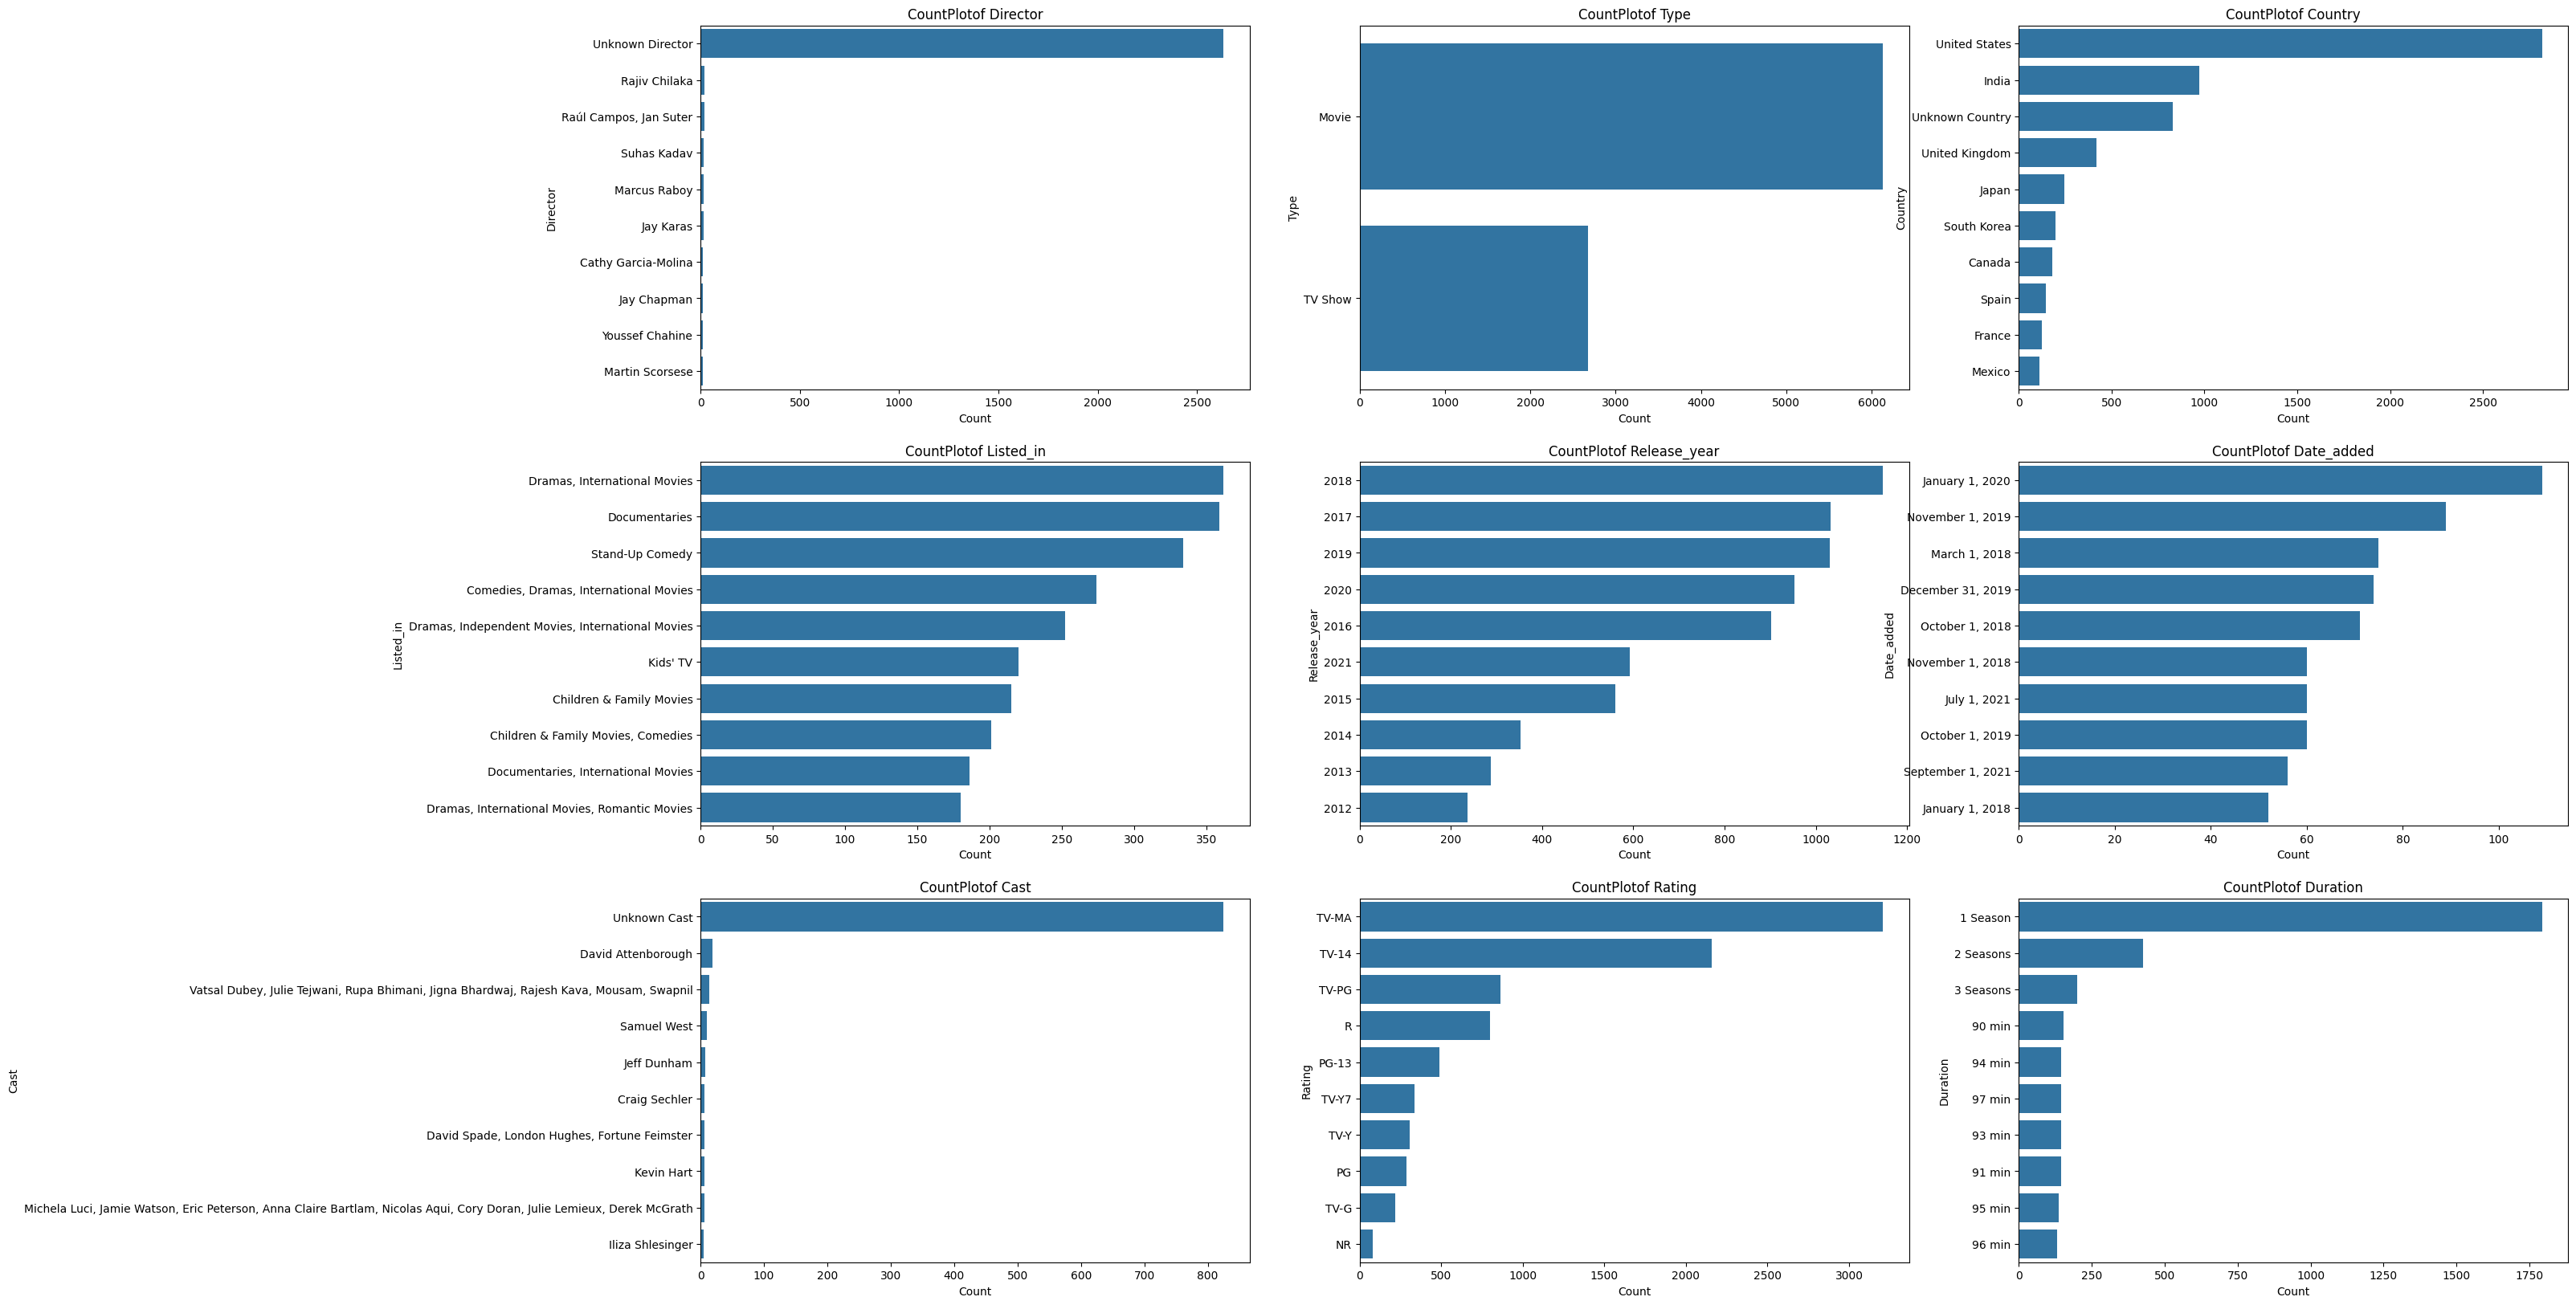

In [19]:
# Countplots for each categorical variab
## Graphical analysis: Countplots for each categorical variable
fig,axes =plt.subplots(3, 3,figsize=(30, 20))
axes= axes.flatten()
for i, column in enumerate(categorical_columns):
  order =netflix_data[column].value_counts().index[:10]
  sns.countplot(y=netflix_data[column],order=order,ax=axes[i])
  axes[i].set_title(f'CountPlotof {column.capitalize()}')
  axes[i].set_xlabel('Count')
  axes[i].set_ylabel(column.capitalize())
  axes[i].tick_params(axis='y',labelsize=10)
  axes[i].tick_params(axis='x',labelsize=10)
plt.show()
     


In [20]:
# Number of movies and TV shows
unique_tv_shows = netflix_data.query('type == "TV Show"')['title'].nunique()
unique_movies = netflix_data.query('type == "Movie"')['title'].nunique()

print(f'Unique TV Show : {unique_tv_shows} and Unique Movies {unique_movies}')

Unique TV Show : 2676 and Unique Movies 6131


In [21]:
# Counting the number of unique titles in each country using the unnested_country dataframe
unique_titles_per_country = unnested_country.groupby('country')['title'].nunique()

# Sorting the result in descending order
unique_titles_per_country_sorted = unique_titles_per_country.sort_values(ascending=False).head(10)

# Displaying the result
unique_titles_per_country_sorted

country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Spain              181
Name: title, dtype: int64

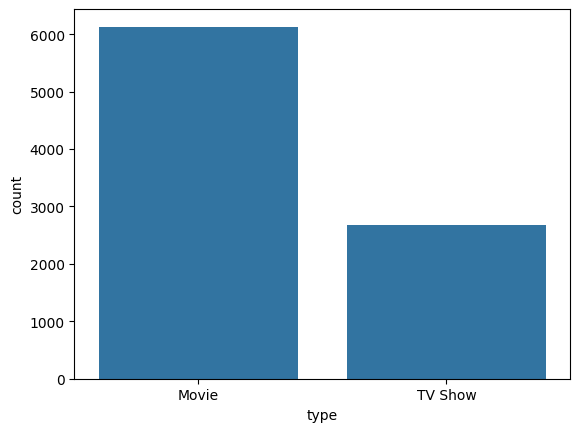

In [22]:
#Count of total movies and Tv shows
sns.countplot(data=netflix_data, x='type')
plt.show()

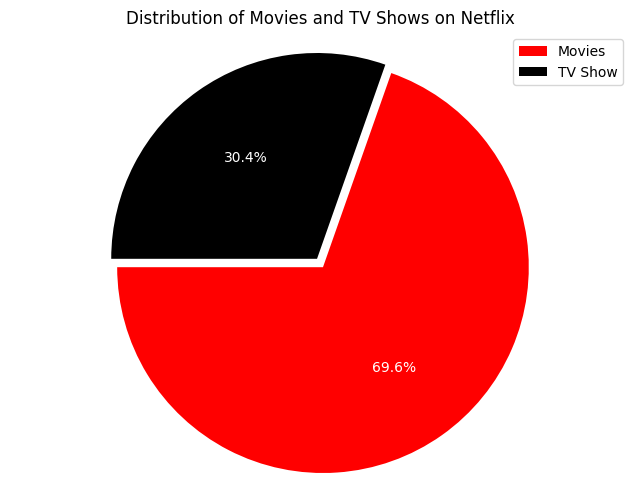

In [23]:
# Data for pie Chanrt
labels = 'Movies', 'TV Show'
sizes = [unique_movies, unique_tv_shows]
colors = ['red', 'black']

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 180, textprops = {'color': 'white'}, explode = (0.025, 0.025) )
plt.axis('equal')

# Adding title and legend
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.legend()
# Show the pie chart
plt.show()

In [28]:
# 1 Total Content available in Netflix
netflix_data['title'].drop_duplicates(keep = 'last').value_counts().value_counts()[1]

netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [31]:
netflix_data['date'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year'] = netflix_data['date'].apply(lambda datetime: datetime.year)
netflix_data['month'] = netflix_data['date'].apply(lambda datetime: datetime.month)


netflix_data.head(5)


ValueError: time data "Unknown Date_added" doesn't match format "%B %d, %Y", at position 1439. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [27]:
# 2 Total Content released in Summer holidays (To predict, whether summer holidays is the best time to release movies. In this prediction, summer month is assumed as May)

mdm = netflix_data[netflix_data['type'] == 'Movie'][['title', 'month']]
mdm = mdm.drop_duplicates(keep = 'last')

mdt = netflix_data[netflix_data['type'] == 'TV Show'][['title', 'month']]
mdt = mdt.drop_duplicates(keep = 'last')

mdm = mdm[mdm['month'] == 5].value_counts().value_counts()[1]
mdt = mdt[mdt['month'] == 5].value_counts().value_counts()[1]


KeyError: "['month'] not in index"